<a href="https://colab.research.google.com/github/Szczureczek1983/Repozytorium2/blob/main/Cluster_analysis_365.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cluster Analysis:
is a multivariate statistical technique that groups observations on the basis some of their features or variables they are descrived by.

Observations in  dataset can be divided into different groups and sometimes this is very useful

The goal of clustering is to maximize the similarity of observations within a cluster and maximize the dissimilarity between clusters.

Cluster analysis (CA) applications:
- Market segmentation 
- Image segmentation

CA is used for:
- explore data
- identify patterns

Rerly used for full data analysis, but is a good stating point.

Example of clustering using K-means

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
# load the data
data = pd.read_csv('/content/3.01.+Country+clusters.csv')
data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


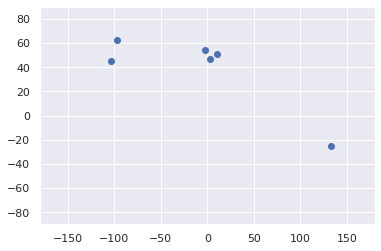

In [4]:
# Plot the data
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90,90)
plt.show()

In [5]:
# select the features
# DataFrame.iloc(row indices, column indices)-slices the data frame,
# given rows and columns to be kept
x = data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [6]:
# Clustering
kmeans = KMeans(2)

In [7]:
kmeans.fit(x)

KMeans(n_clusters=2)

In [8]:
# clustering results

from scipy.sparse.construct import identity
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [9]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


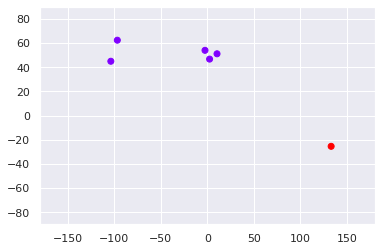

In [10]:
# Plot the clusters
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180, 180)
plt.ylim(-90,90)
plt.show()

In [11]:
kmeans = KMeans(3)
kmeans.fit(x)
from scipy.sparse.construct import identity
identified_clusters = kmeans.fit_predict(x)
identified_clusters


array([1, 1, 0, 0, 0, 2], dtype=int32)

In [12]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


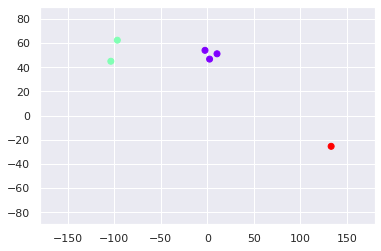

In [13]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180, 180)
plt.ylim(-90,90)
plt.show()

Clustering categorical data

In [14]:
data = pd.read_csv('/content/3.01.+Country+clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [17]:
# Map the data
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French': 1, 'German': 2})
# This not the optimal way to encode them but it will work for now
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [20]:
# Select the features for clustering
x = data_mapped.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [23]:
# Clustering
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [24]:
# Clustering results
ind_clusters = kmeans.fit_predict(x)
ind_clusters

array([0, 0, 2, 0, 1, 0], dtype=int32)

In [26]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = ind_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


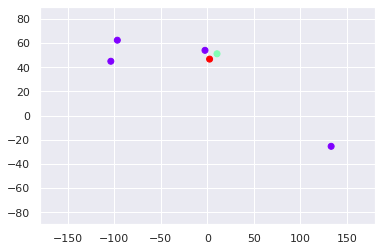

In [27]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [28]:
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [29]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [30]:
ind_clusters = kmeans.fit_predict(x)
ind_clusters

array([2, 2, 1, 1, 1, 0], dtype=int32)

In [31]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = ind_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,2
1,Canada,62.40,-96.80,0,2
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


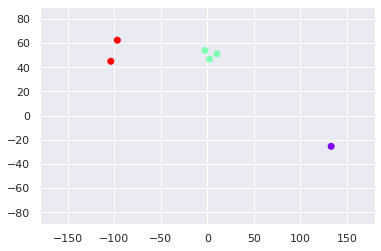

In [32]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [33]:
# WCSS (within-cluster sum of squares) - useful for searching optimal cluster number
kmeans.inertia_


290.10523333333333

In [35]:

wcss = []
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

In [36]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Text(0, 0.5, 'Within-cluster sum of squares')

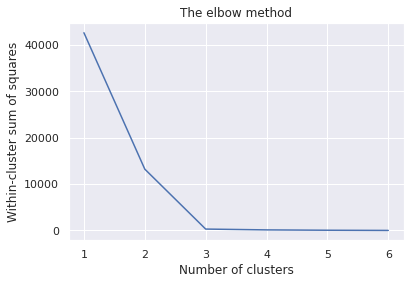

In [37]:
# the elbow method
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')

The two cluster solution would be suboptimal as the leap from 2 to 3 is very big.